In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [2]:
path = '../input/'

In [3]:
with open(f'{path}mission-dtypes.yaml', 'r') as yamlfile:
    dtypes = yaml.load(yamlfile)

In [4]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'dtype': dtypes,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

In [5]:
df = pd.read_csv(f'{path}ice-air-missions.csv.gz', **read_csv_opts)

In [6]:
df.head()

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,MissionQuarter,MissionYear,MissionTotalCost,MissionPassengers,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization
0,105,110005,N772AS,2010-10-01,2011,10,40,KSAT,KMDT,KAEX,...,4,2010,0.0,125,NaN,NaN,NaN,NaN,NaN,NaN
1,106,110006,N125MN,2010-10-01,2011,10,40,KSAT,KHRL,MGGT,...,4,2010,0.0,136,NaN,NaN,NaN,NaN,NaN,NaN
2,107,110007,N743VA,2010-10-01,2011,10,40,KAEX,MHLM,NaN,...,4,2010,0.0,100,NaN,NaN,NaN,NaN,NaN,NaN
3,108,110008,N974AS,2010-10-01,2011,10,40,KAEX,KORD,KMCI,...,4,2010,50641.5,139,NaN,NaN,NaN,NaN,NaN,NaN
4,131,110002,N120MN,2010-10-01,2011,10,40,KIWA,KOAK,KBFL,...,4,2010,42191.1,114,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16967 entries, 0 to 16966
Data columns (total 39 columns):
MissionID                    16967 non-null uint16
MissionNumber                16967 non-null uint32
MsnTailNumber                16966 non-null category
MissionDate                  16967 non-null datetime64[ns]
MissionFY                    16967 non-null uint16
MissionMonth                 16967 non-null uint8
MissionWeek                  16967 non-null uint8
MsnStart                     16967 non-null category
MsnStpOne                    16838 non-null category
MsnStpTwo                    12421 non-null category
MsnStpThree                  5375 non-null category
MsnStpFour                   1662 non-null category
MsnStpFive                   179 non-null category
MsnStpSix                    39 non-null category
MsnStpSeven                  21 non-null category
MsnStpEight                  9 non-null category
MsnEnd                       16960 non-null category
msnDelayRe

In [8]:
df.columns

Index(['MissionID', 'MissionNumber', 'MsnTailNumber', 'MissionDate',
       'MissionFY', 'MissionMonth', 'MissionWeek', 'MsnStart', 'MsnStpOne',
       'MsnStpTwo', 'MsnStpThree', 'MsnStpFour', 'MsnStpFive', 'MsnStpSix',
       'MsnStpSeven', 'MsnStpEight', 'MsnEnd', 'msnDelayReason',
       'msnCancelReason', 'msnFlightODCCost', 'msnProposedFines',
       'msnEnforcedFines', 'msnGeneralFlightCost', 'msnFlightHoursPlanned',
       'msnFlightHoursActual', 'msnCharterDesignation', 'Status', 'msnVendor',
       'msnInvoiceNumber', 'MissionQuarter', 'MissionYear', 'MissionTotalCost',
       'MissionPassengers', 'LegPassengers', 'MissionUtilization',
       'LegUtilization', 'ManifestedPassengers', 'StruckPassengers',
       'PlannedMissionUtilization'],
      dtype='object')

In [9]:
df.loc[2, :]

MissionID                                    107
MissionNumber                             110007
MsnTailNumber                             N743VA
MissionDate                  2010-10-01 00:00:00
MissionFY                                   2011
MissionMonth                                  10
MissionWeek                                   40
MsnStart                                    KAEX
MsnStpOne                                   MHLM
MsnStpTwo                                    NaN
MsnStpThree                                  NaN
MsnStpFour                                   NaN
MsnStpFive                                   NaN
MsnStpSix                                    NaN
MsnStpSeven                                  NaN
MsnStpEight                                  NaN
MsnEnd                                      KAEX
msnDelayReason                               NaN
msnCancelReason                              NaN
msnFlightODCCost                               0
msnProposedFines    

In [10]:
df['MissionTotalCost'].min()

-80287.2

In [11]:
df['MissionTotalCost'].max()

1492806.04

In [12]:
df['MissionTotalCost'].describe()

count    1.696000e+04
mean     5.802397e+04
std      5.016311e+04
min     -8.028720e+04
25%      4.651560e+04
50%      5.846310e+04
75%      7.052851e+04
max      1.492806e+06
Name: MissionTotalCost, dtype: float64

In [13]:
df[df['MissionTotalCost'] < 0]

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,MissionQuarter,MissionYear,MissionTotalCost,MissionPassengers,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization
12397,13087,161523,N807WA,2016-09-14,2016,9,38,KAEX,KBRO,MGGT,...,3,2016,-43391.20,0,NaN,NaN,NaN,NaN,NaN,NaN
15888,47161,190053,N420US,2018-10-10,2019,10,41,KIWA,KELP,KBRO,...,4,2018,-22797.62,73,NaN,0.540741,NaN,140.0,67.0,1.037037
15934,47206,190099,N802WA,2018-10-19,2019,10,42,KBRO,KEWR,KGYY,...,4,2018,-72322.20,0,NaN,0.000000,NaN,0.0,0.0,0.000000
15980,47255,190168,N802WA,2018-10-30,2019,10,44,KELP,KBRO,KELP,...,4,2018,-15530.66,112,NaN,0.829630,NaN,114.0,2.0,0.844444
16077,47353,190257,N802WA,2018-11-19,2019,11,47,KELP,NaN,NaN,...,4,2018,-47994.95,122,NaN,0.903704,NaN,125.0,3.0,0.925926
16101,47377,190277,N418US,2018-11-23,2019,11,47,KIWA,KMEM,NaN,...,4,2018,-48427.20,109,NaN,0.807407,NaN,136.0,27.0,1.007407
16110,47385,190320,N529AU,2018-11-26,2019,11,48,KELP,KBRO,MGGT,...,4,2018,-23500.00,0,NaN,0.000000,NaN,0.0,0.0,0.000000
16282,47562,190466,N803WA,2018-12-28,2019,12,52,KBRO,MGGT,NaN,...,4,2018,-41816.00,0,NaN,0.000000,NaN,0.0,0.0,0.000000
16295,47605,190484,N313XA,2019-01-02,2019,1,1,KAEX,KRIC,KTOL,...,1,2019,-34000.00,0,NaN,0.000000,NaN,0.0,0.0,0.000000
16298,47608,190487,N531AU,2019-01-03,2019,1,1,KIWA,KAEX,MSLP,...,1,2019,-80287.20,0,NaN,0.000000,NaN,0.0,0.0,0.000000


In [14]:
df['MissionTotalCost'].sum()

984086606.05

In [15]:
len(df[df['MissionTotalCost'] == 0])

1560

In [16]:
len(df[df['MissionPassengers'] == 0])

1239

In [17]:
df['MissionPassengers'].describe()

count    16967.000000
mean       116.740555
std         52.181480
min          0.000000
25%         94.000000
50%        126.000000
75%        142.000000
max        476.000000
Name: MissionPassengers, dtype: float64

In [18]:
df['CostPerPassenger'] = df['MissionTotalCost'] / df['MissionPassengers']

In [19]:
df['CostPerPassenger'] = df['CostPerPassenger'].replace([np.inf, -np.inf], np.nan)

In [20]:
df['CostPerPassenger'].describe()

count     15722.000000
mean        828.765561
std        4494.658058
min        -484.489655
25%         362.661250
50%         471.251048
75%         624.670758
max      328000.000000
Name: CostPerPassenger, dtype: float64

In [21]:
df['MissionDate'] = pd.to_datetime(df['MissionDate'])

In [22]:
df = df.set_index('MissionDate')

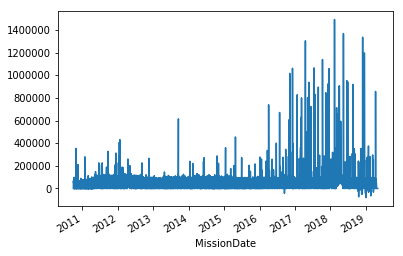

In [23]:
df['MissionTotalCost'].plot()

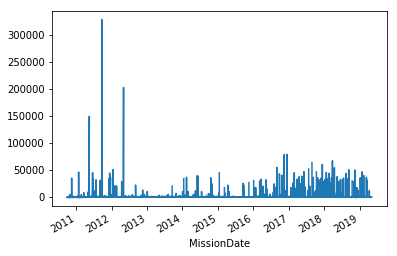

In [24]:
df['CostPerPassenger'].plot()

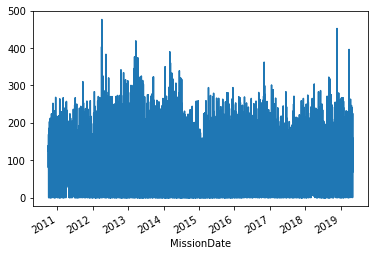

In [25]:
df['MissionPassengers'].plot()

In [26]:
df['msnCharterDesignation'].value_counts()

IWA #3           2374
AEX #1           2073
SAT #1           2021
IWA #1           1972
AEX #2           1890
MIA              1703
IWA #2           1576
SAT #2           1308
BRO #1           1086
BRO #2            404
LRIC              230
SAT #3            135
MIRP               78
IWA #4             53
MIA #2             28
Cuba Contract      11
AEX #3              8
MIA #1              3
mirp                2
Aex #2              1
sat #2              1
IWA#2               1
IWA3                1
Iwa #2              1
Mia                 1
IWA#3               1
Name: msnCharterDesignation, dtype: int64

In [27]:
df['msnVendor'] = df['msnVendor'].str.upper()

In [28]:
df['msnVendor'].value_counts()

CSI                       8432
CAC                       1408
ACT                        226
ATS                         66
PJS                         19
ZEPHYR                      17
AIR PARTNER                 14
JEFT EDGE                    6
EXECUTIVE FLIGHTWAYS         1
ADVANCE AIR AMBULANCE        1
MIAMI AIR INTL               1
9003A                        1
7962                         1
-                            1
AIR CHARTER SERVICE          1
VDI                          1
PEGASUS ELITE AVIATION       1
8.92                         1
6.05                         1
ATC                          1
OCS                          1
AIR AMBULACE                 1
Name: msnVendor, dtype: int64

In [29]:
df['MsnTailNumber'] = df['MsnTailNumber'].str.upper()

In [30]:
df['MsnTailNumber'].value_counts().head(10)

N804WA    1079
N125MN    1008
N836NK     977
N806WA     866
N418US     855
N593AN     725
N43XA      712
N305FA     685
N803WA     649
N802WA     555
Name: MsnTailNumber, dtype: int64

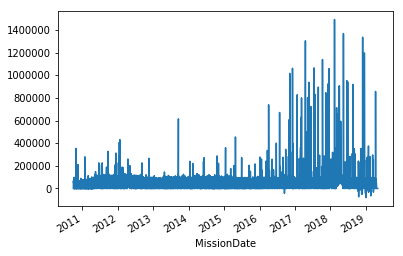

In [31]:
df['MissionTotalCost'].plot()

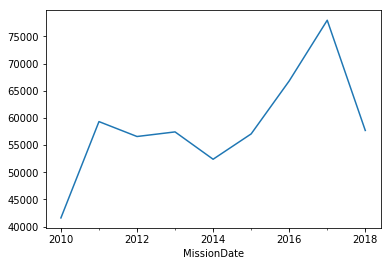

In [32]:
df['MissionTotalCost'].resample('AS-OCT').mean().plot()

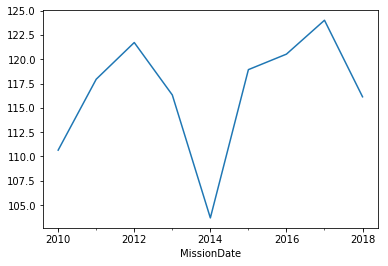

In [33]:
df['MissionPassengers'].resample('AS-OCT').mean().plot()

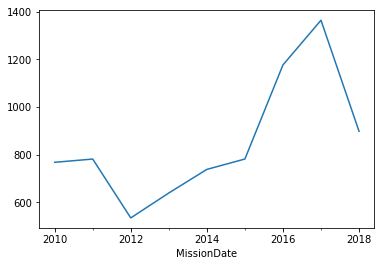

In [34]:
df['CostPerPassenger'].resample('AS-OCT').mean().plot()

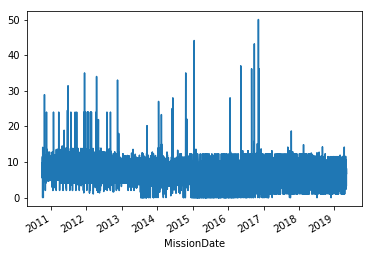

In [35]:
df['msnFlightHoursPlanned'].plot()

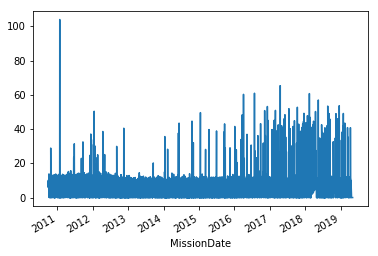

In [36]:
df['msnFlightHoursActual'].plot()

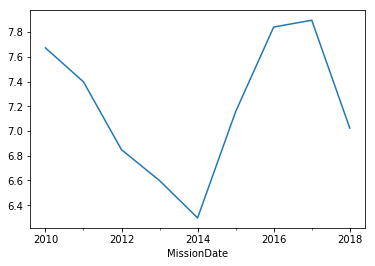

In [37]:
df['msnFlightHoursActual'].resample('AS-OCT').mean().plot()

In [38]:
df['CostPerFlightHour'] = df['MissionTotalCost'] / df['msnFlightHoursActual']
df['CostPerFlightHour'] = df['CostPerFlightHour'].replace([np.inf, -np.inf], np.nan)

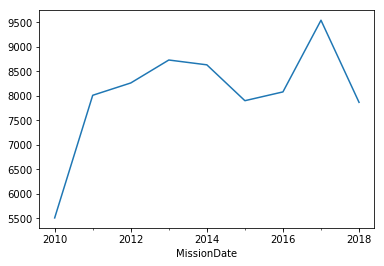

In [39]:
df['CostPerFlightHour'].resample('AS-OCT').mean().plot()

In [40]:
vendor = df.groupby('msnVendor')

In [41]:
vendor['CostPerFlightHour'].mean().sort_values(ascending=False)

msnVendor
AIR CHARTER SERVICE       455000.000000
MIAMI AIR INTL             12265.036494
AIR AMBULACE               10092.307692
CSI                         8525.645579
PEGASUS ELITE AVIATION      8250.655159
OCS                         8153.760056
ACT                         8039.399149
VDI                         7997.000186
7962                        7896.999916
6.05                        7891.362728
9003A                       7837.000359
CAC                         7754.022307
AIR PARTNER                 7734.987424
8.92                        7664.999813
ATC                         6674.480344
PJS                         6649.898022
ATS                         6604.582120
JEFT EDGE                   6531.085563
ZEPHYR                      4586.000000
-                                   NaN
ADVANCE AIR AMBULANCE               NaN
EXECUTIVE FLIGHTWAYS                NaN
Name: CostPerFlightHour, dtype: float64

In [42]:
vendor['CostPerPassenger'].median().sort_values(ascending=False)

msnVendor
AIR AMBULACE              328000.000000
ATC                        50993.030000
JEFT EDGE                  35629.672500
EXECUTIVE FLIGHTWAYS       35321.758333
ATS                        32611.682500
AIR PARTNER                32301.571429
PEGASUS ELITE AVIATION     31490.000000
PJS                        27071.470000
AIR CHARTER SERVICE        10111.111111
MIAMI AIR INTL              4027.949432
ZEPHYR                      2641.666667
OCS                          635.592295
6.05                         521.142475
CSI                          485.206842
CAC                          466.037234
7962                         464.110574
ACT                          450.139175
8.92                         409.500000
9003A                        262.460604
VDI                          242.871852
ADVANCE AIR AMBULANCE          0.000000
-                                   NaN
Name: CostPerPassenger, dtype: float64

In [43]:
vendor['MissionTotalCost'].median().sort_values(ascending=False).head(10)

msnVendor
AIR CHARTER SERVICE       455000.000
MIAMI AIR INTL            354459.550
AIR AMBULACE              328000.000
ATC                       305958.180
ATS                       253323.845
JEFT EDGE                 230478.510
AIR PARTNER               225958.115
PJS                       220811.450
EXECUTIVE FLIGHTWAYS      211930.550
PEGASUS ELITE AVIATION    188940.000
Name: MissionTotalCost, dtype: float64

In [44]:
vendor['msnFlightHoursActual'].median().sort_values(ascending=False).head(12)

msnVendor
ATC                       45.840000
ATS                       37.715000
JEFT EDGE                 36.650002
PJS                       36.169998
AIR AMBULACE              32.500000
MIAMI AIR INTL            28.900000
AIR PARTNER               27.500000
PEGASUS ELITE AVIATION    22.900000
OCS                        9.510000
ACT                        7.920000
8.92                       7.800000
CAC                        7.450000
Name: msnFlightHoursActual, dtype: float32

In [45]:
vendor['MissionID'].count().sort_values(ascending=False)

msnVendor
CSI                       8432
CAC                       1408
ACT                        226
ATS                         66
PJS                         19
ZEPHYR                      17
AIR PARTNER                 14
JEFT EDGE                    6
AIR AMBULACE                 1
6.05                         1
7962                         1
8.92                         1
9003A                        1
ADVANCE AIR AMBULANCE        1
ATC                          1
AIR CHARTER SERVICE          1
VDI                          1
EXECUTIVE FLIGHTWAYS         1
MIAMI AIR INTL               1
OCS                          1
PEGASUS ELITE AVIATION       1
-                            1
Name: MissionID, dtype: int64

In [46]:
sum(df['msnVendor'].isnull())

6765

In [47]:
len(df)

16967

In [48]:
df.groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['MissionID'].count().unstack().T

MissionDate,2010-10-01 00:00:00,2011-10-01 00:00:00,2012-10-01 00:00:00,2013-10-01 00:00:00,2014-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
msnVendor,,,,,,,,,
-,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6.05,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7962,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8.92,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9003A,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ACT,NaN,NaN,119.0,107.0,NaN,NaN,NaN,NaN,NaN
ADVANCE AIR AMBULANCE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR AMBULACE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR CHARTER SERVICE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [49]:
df['msnCharterDesignation'] = df['msnCharterDesignation'].str.upper()

In [50]:
lric = df['msnCharterDesignation'] == 'LRIC'

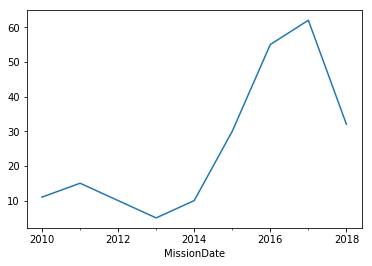

In [51]:
df[lric].resample('AS-OCT')['MissionID'].count().plot()

In [52]:
df.groupby('msnCharterDesignation')['MissionTotalCost'].median()

msnCharterDesignation
AEX #1            60975.600
AEX #2            61252.500
AEX #3            54379.750
BRO #1            56844.175
BRO #2            43170.300
CUBA CONTRACT      7300.000
IWA #1            69834.960
IWA #2            57578.400
IWA #3            52339.280
IWA #4            41929.300
IWA#2                 0.000
IWA#3             58444.310
IWA3              42500.000
LRIC             225896.115
MIA               63176.000
MIA #1            57413.270
MIA #2             9977.000
MIRP              49575.000
SAT #1            55472.860
SAT #2            54252.800
SAT #3            54229.000
Name: MissionTotalCost, dtype: float64

In [53]:
df.groupby([pd.Grouper(freq='AS-OCT'), 'msnCharterDesignation'])['MissionTotalCost'].median().unstack().T

MissionDate,2010-10-01 00:00:00,2011-10-01 00:00:00,2012-10-01 00:00:00,2013-10-01 00:00:00,2014-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
msnCharterDesignation,,,,,,,,,
AEX #1,0.00,67016.000,64029.28,60975.600,58247.820,58417.660,60385.910,69244.875,62696.095
AEX #2,51187.50,63947.610,62640.89,66207.800,61199.150,59795.435,58368.280,68376.650,58697.325
AEX #3,0.00,NaN,61252.50,60839.600,0.000,NaN,NaN,NaN,NaN
BRO #1,NaN,NaN,49209.30,57115.500,50525.250,57285.200,58920.000,60252.260,52681.775
BRO #2,NaN,NaN,NaN,46571.100,42573.015,19592.500,52423.180,39213.160,43170.300
CUBA CONTRACT,NaN,NaN,NaN,10475.000,7300.000,NaN,NaN,NaN,NaN
IWA #1,69917.60,71973.000,70983.00,73981.600,63370.410,66523.280,68099.215,80432.595,67455.605
IWA #2,53576.00,56628.660,56628.66,63289.160,57160.760,56482.060,45464.110,67424.090,49183.875
IWA #3,29588.90,37840.055,41278.37,52036.170,54389.905,55152.150,56105.540,52336.720,71525.700


In [54]:
df['ZeroTotalCost'] = df['MissionTotalCost'] <= 0

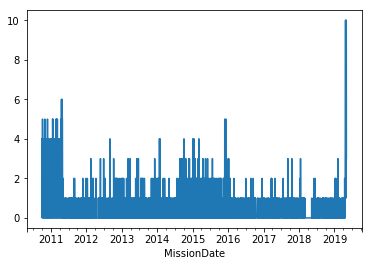

In [55]:
df['ZeroTotalCost'].resample('D').sum().plot()

In [56]:
df['cancelled'] = df['msnCancelReason'].notnull()

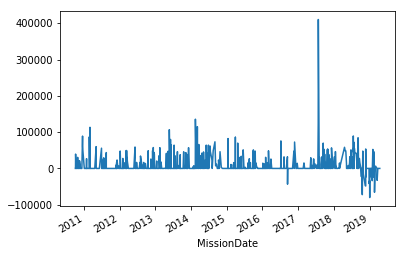

In [57]:
df[df['cancelled'] == True]['MissionTotalCost'].plot()

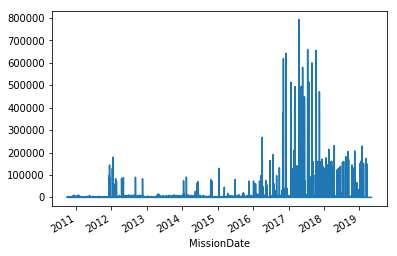

In [58]:
df['msnFlightODCCost'].plot()

In [59]:
df.groupby('msnCharterDesignation')['msnFlightODCCost'].mean()

msnCharterDesignation
AEX #1             792.864993
AEX #2             709.164527
AEX #3             770.958750
BRO #1             614.079576
BRO #2             266.338762
CUBA CONTRACT        0.000000
IWA #1             472.576379
IWA #2             259.074033
IWA #3             520.791268
IWA #4            1045.936226
IWA#2                0.000000
IWA#3                0.000000
IWA3                 0.000000
LRIC             93308.723087
MIA                362.981309
MIA #1            2730.780000
MIA #2              64.693929
MIRP                 0.000000
SAT #1             360.549471
SAT #2             332.114125
SAT #3             446.364963
Name: msnFlightODCCost, dtype: float64

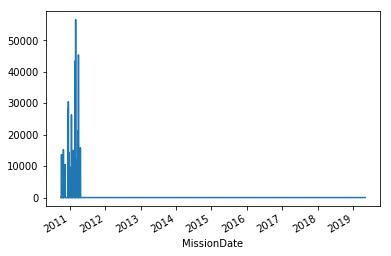

In [60]:
df['msnProposedFines'].plot()

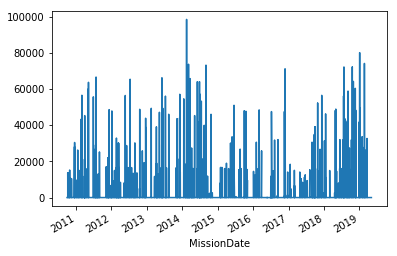

In [61]:
df['msnEnforcedFines'].plot()

In [62]:
df.groupby('msnCharterDesignation')['msnEnforcedFines'].mean()

msnCharterDesignation
AEX #1             380.818890
AEX #2             415.554434
AEX #3               0.000000
BRO #1             474.885516
BRO #2             316.232203
CUBA CONTRACT        0.000000
IWA #1             380.456317
IWA #2             385.907457
IWA #3             340.676832
IWA #4             302.807547
IWA#2                0.000000
IWA#3                0.000000
IWA3             42500.000000
LRIC                 3.101217
MIA                658.951938
MIA #1               0.000000
MIA #2             564.680000
MIRP                 0.000000
SAT #1             560.339614
SAT #2             540.565011
SAT #3             483.596667
Name: msnEnforcedFines, dtype: float64

In [63]:
df.sort_values(by='msnEnforcedFines', ascending=False).head().T

MissionDate,2014-02-14 00:00:00,2019-01-03 00:00:00,2019-02-21 00:00:00,2014-03-06 00:00:00,2014-09-02 00:00:00
MissionID,7848,47608,47874,7939,9360
MissionNumber,140820,190487,190751,140946,142272
MsnTailNumber,N804WA,N531AU,N441US,N307FA,N804WA
MissionFY,2014,2019,2019,2014,2014
MissionMonth,2,1,2,3,9
MissionWeek,7,1,8,10,36
MsnStart,MKJP,KIWA,KIWA,KIWA,KAEX
MsnStpOne,KMIA,KAEX,NaN,MGGT,MDSD
MsnStpTwo,KAEX,MSLP,NaN,NaN,NaN
MsnStpThree,SEGU,NaN,NaN,NaN,NaN


In [64]:
df.groupby('msnCancelReason')['msnEnforcedFines'].mean()

msnCancelReason
1                                      0.000000
10                                     0.000000
11                                     0.000000
18                                     0.000000
19                                     0.000000
2                                  14079.104783
20                                     0.000000
21                                     0.000000
8                                      0.000000
Aircraft/Security Crew Issues      28207.805556
Aircraft/Security/ Crew Issues     28500.000000
Airport Change                         0.000000
Canceled by FO                       539.997288
Civil unrest in foreign country     4000.000000
Delay & Time Constraint            12271.720000
Host Country Denied                    0.000000
Host Country Holiday                   0.000000
Insufficient Numbers                  13.950857
Lack of destination bedspace           0.000000
Mechanical                         22921.256961
Medical                 

In [65]:
df['msnCancelReason'].value_counts()

Insufficient Numbers               350
Mechanical                         205
10                                 149
Weather                             80
Canceled by FO                      59
OOC Mission Priority                28
2                                   23
Sched Change                        21
Host Country Denied                 17
low transfer/removal numbers        16
Mission Moved CSI                   15
Delay & Time Constraint             13
Aircraft/Security Crew Issues        9
mechanical                           9
1                                    9
Host Country Holiday                 9
21                                   8
Civil unrest in foreign country      6
Medical                              4
18                                   4
Airport Change                       3
19                                   3
11                                   3
holidays                             3
Aircraft/Security/ Crew Issues       2
20                       

In [66]:
df.groupby('msnDelayReason')['msnEnforcedFines'].mean()

msnDelayReason
2                                 5260.440000
Aircraft/Security Crew Issues        0.000000
Crew Issues                      14384.480000
Field Office Issues               2807.610000
Mechanical                        1188.652059
Weather                              0.000000
Name: msnEnforcedFines, dtype: float64

In [67]:
df['msnCancelReason'].value_counts()

Insufficient Numbers               350
Mechanical                         205
10                                 149
Weather                             80
Canceled by FO                      59
OOC Mission Priority                28
2                                   23
Sched Change                        21
Host Country Denied                 17
low transfer/removal numbers        16
Mission Moved CSI                   15
Delay & Time Constraint             13
Aircraft/Security Crew Issues        9
mechanical                           9
1                                    9
Host Country Holiday                 9
21                                   8
Civil unrest in foreign country      6
Medical                              4
18                                   4
Airport Change                       3
19                                   3
11                                   3
holidays                             3
Aircraft/Security/ Crew Issues       2
20                       

In [68]:
df[lric].resample('AS-OCT')['msnVendor'].value_counts()

MissionDate  msnVendor             
2010-10-01   AIR AMBULACE               1
             AIR PARTNER                1
             CSI                        1
             EXECUTIVE FLIGHTWAYS       1
             MIAMI AIR INTL             1
             PEGASUS ELITE AVIATION     1
2011-10-01   AIR PARTNER               12
             ADVANCE AIR AMBULANCE      1
             CSI                        1
2012-10-01   CSI                        7
             AIR PARTNER                1
             ZEPHYR                     1
2013-10-01   JEFT EDGE                  5
2014-10-01   PJS                        8
             AIR CHARTER SERVICE        1
             JEFT EDGE                  1
2015-10-01   PJS                       11
             ZEPHYR                     7
             CSI                        2
2016-10-01   ATS                       25
             CSI                       23
             ZEPHYR                     2
2017-10-01   ATS                       3

In [69]:
df[lric].groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['CostPerPassenger'].mean()

MissionDate  msnVendor             
2010-10-01   AIR AMBULACE              328000.000000
             AIR PARTNER                32301.571429
             CSI                        46576.940000
             EXECUTIVE FLIGHTWAYS       35321.758333
             MIAMI AIR INTL              4027.949432
             PEGASUS ELITE AVIATION     31490.000000
2011-10-01   ADVANCE AIR AMBULANCE          0.000000
             AIR PARTNER                47022.798849
             CSI                         2933.762925
2012-10-01   AIR PARTNER                13340.302500
             CSI                         6698.470028
             ZEPHYR                         0.000000
2013-10-01   JEFT EDGE                  32370.255429
2014-10-01   AIR CHARTER SERVICE        10111.111111
             JEFT EDGE                  22555.810000
             PJS                        27861.062752
2015-10-01   CSI                         9127.956095
             PJS                        28503.458293
          

In [70]:
df[lric]['msnFlightHoursActual'].mean()

24.94223

In [71]:
df[lric]['msnFlightHoursActual'].median()

29.56

In [72]:
df[lric].groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['msnFlightHoursActual'].mean()

MissionDate  msnVendor             
2010-10-01   AIR AMBULACE              32.500000
             AIR PARTNER                0.000000
             CSI                       33.299999
             EXECUTIVE FLIGHTWAYS       0.000000
             MIAMI AIR INTL            28.900000
             PEGASUS ELITE AVIATION    22.900000
2011-10-01   ADVANCE AIR AMBULANCE      0.000000
             AIR PARTNER               28.216667
             CSI                       30.200001
2012-10-01   AIR PARTNER               40.500000
             CSI                        5.837143
             ZEPHYR                     0.000000
2013-10-01   JEFT EDGE                 31.412001
2014-10-01   AIR CHARTER SERVICE        1.000000
             JEFT EDGE                 39.689999
             PJS                       37.977501
2015-10-01   CSI                       44.385002
             PJS                       31.272726
             ZEPHYR                     0.928571
2016-10-01   ATS                 

In [73]:
stop_cols = ['MsnStart',
             'MsnStpOne',
             'MsnStpTwo',
             'MsnStpThree',
             'MsnStpFour',
             'MsnStpFive',
             'MsnStpSix',
             'MsnStpSeven',
             'MsnStpEight',
             'MsnEnd']

In [74]:
df[stop_cols].melt()['value'].value_counts().head(20)

KIWA    11651
KAEX     9817
KSAT     6748
KBRO     5223
KMIA     3629
KELP     3546
MGGT     3528
KHRL     3272
MHLM     2419
MSLP     1845
KLRD     1366
KSAN     1347
KCSG     1343
KMDT     1072
KIAH     1062
KOAK     1025
KBFL      782
KEWR      732
MMMX      666
KLAS      601
Name: value, dtype: int64

In [75]:
pd.crosstab(**df[stop_cols].melt(var_name='columns', value_name='index'))

columns,MsnEnd,MsnStart,MsnStpEight,MsnStpFive,MsnStpFour,MsnStpOne,MsnStpSeven,MsnStpSix,MsnStpThree,MsnStpTwo
index,,,,,,,,,,
BIKF,0,0,0,0,1,1,0,0,0,0
BKPR,0,0,0,0,0,0,0,0,0,1
CYOX,0,0,0,0,0,1,0,0,0,0
CYQX,0,0,1,0,0,1,0,0,0,0
CYYT,0,0,0,0,0,0,0,1,0,0
DBBB,0,0,0,0,1,0,0,0,0,0
DFFD,0,0,0,0,0,0,0,0,1,1
DGAA,0,0,0,2,2,2,0,0,0,4
DGGA,0,0,0,0,1,0,0,0,0,0


In [76]:
df.loc[df['MissionTotalCost'].idxmax()][stop_cols]

,MsnStart,MsnStpOne,MsnStpTwo,MsnStpThree,MsnStpFour,MsnStpFive,MsnStpSix,MsnStpSeven,MsnStpEight,MsnEnd
MissionDate,,,,,,,,,,
2018-02-12,KMIA,KCSG,KMIA,MHLM,NaN,NaN,NaN,NaN,NaN,KMIA
2018-02-12,KBRO,MGGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KBRO
2018-02-12,KSAT,KELP,KLRD,MGGT,NaN,NaN,NaN,NaN,NaN,KSAT
2018-02-12,KAEX,KEWR,KPSM,NaN,NaN,NaN,NaN,NaN,NaN,KAEX
2018-02-12,KAEX,KMDT,KOMA,NaN,NaN,NaN,NaN,NaN,NaN,KAEX
2018-02-12,KELP,PHNL,PGUM,VGHS,VIDP,OPRN,PGUM,PHNL,NaN,KELP


# Finding missions with at least 1 stop at a given airport

In [80]:
# Update to search for list of targets
target = 'KEWR'
target_found = []
for i, row in df.iterrows():
    target_found.append(target in row[stop_cols].values)

In [81]:
airport = df[target_found]

In [101]:
stops = airport[stop_cols].melt()['value'].value_counts().index.values

In [112]:
international_stops = [i for i in stops if not i.startswith('K')]

In [ ]:
['MSLP', 'MGGT', 'MHLM', 'MKJP', 'MMMX']

In [84]:
airport.tail()

,MissionID,MissionNumber,MsnTailNumber,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,MsnStpThree,...,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization,CostPerPassenger,CostPerFlightHour,ZeroTotalCost,cancelled
MissionDate,,,,,,,,,,,,,,,,,,,,,
2019-04-23,48254,191134,N801WA,2019,4,17,KBRO,KMDT,KEWR,KAEX,...,NaN,1.096296,NaN,179.0,31.0,1.325926,0.0,NaN,True,False
2019-04-23,48256,191105,N804TJ,2019,4,17,KAEX,KPSM,KEWR,KLRD,...,NaN,0.955556,NaN,147.0,18.0,1.088889,0.0,NaN,True,False
2019-04-29,48295,191181,N803WA,2019,4,18,KBRO,KMDT,KEWR,NaN,...,NaN,0.525926,NaN,81.0,10.0,0.600000,0.0,NaN,True,False
2019-04-30,48309,191152,N804TJ,2019,4,18,KAEX,KPSM,KEWR,KLRD,...,NaN,0.829630,NaN,135.0,23.0,1.000000,0.0,NaN,True,False
2019-05-03,48327,191165,N801WA,2019,5,18,KBRO,KEWR,KORD,KAEX,...,NaN,0.000000,NaN,0.0,0.0,0.000000,NaN,NaN,True,False


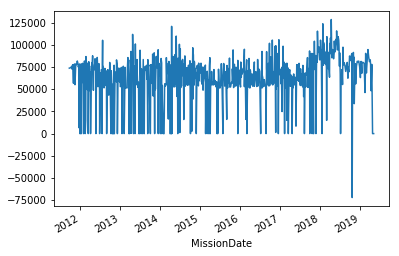

In [95]:
airport['MissionTotalCost'].plot()

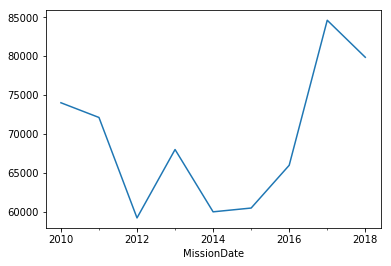

In [85]:
airport['MissionTotalCost'].resample('AS-OCT').median().plot()

In [86]:
airport[airport['msnFlightHoursPlanned'].between(4,20)]['MissionTotalCost'].median()

69873.02

In [87]:
airport[airport['msnFlightHoursPlanned'].between(4,20)]['CostPerPassenger'].median()

567.0737662337663

In [88]:
airport[airport['MissionPassengers'] > 0]['MissionPassengers'].mean()

127.96273291925466

In [89]:
airport[airport['MissionPassengers'] > 0]['CostPerPassenger'].median()

566.506178891531

In [90]:
airport['msnFlightHoursPlanned'].mean()

7.9222817

In [91]:
airport['msnFlightHoursActual'].mean()

7.2510924

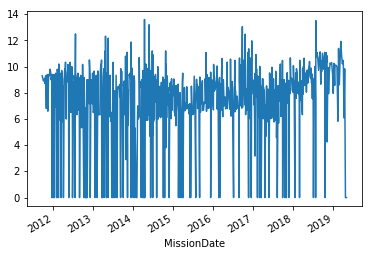

In [92]:
airport['msnFlightHoursActual'].plot()

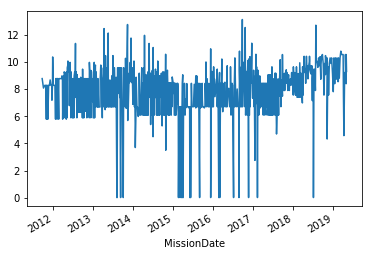

In [93]:
airport['msnFlightHoursPlanned'].plot()

In [94]:
airport.loc[airport['MissionTotalCost'].idxmax()].T

MissionID                         46254
MissionNumber                    180908
MsnTailNumber                    N807WA
MissionFY                          2018
MissionMonth                          4
MissionWeek                          15
MsnStart                           KBRO
MsnStpOne                          KEWR
MsnStpTwo                          KABQ
MsnStpThree                         NaN
MsnStpFour                          NaN
MsnStpFive                          NaN
MsnStpSix                           NaN
MsnStpSeven                         NaN
MsnStpEight                         NaN
MsnEnd                             KBRO
msnDelayReason                      NaN
msnCancelReason                     NaN
msnFlightODCCost                21201.8
msnProposedFines                      0
msnEnforcedFines                      0
msnGeneralFlightCost         107,820.60
msnFlightHoursPlanned             10.45
msnFlightHoursActual              10.65
msnCharterDesignation            BRO #1
